In [1]:
import matplotlib.pyplot as plt
import numpy as np
import re
import ast 
import torch

In [2]:
def test_val_extractor(file_name):    
    # get accuracy from sparsity.txt
    test_val_accumulator = list()
    with open(file_name) as fi:
        for i, line in enumerate(fi):
            if i == 0:
                line = ast.literal_eval(line)
                test_val_accumulator = line
                
    # return list of test accuracy 
    return test_val_accumulator[:30]

In [3]:
def selectivity_val_extractor(file_name):
    selectivity_average = 0
    selectivity_std = 0
    with open(file_name) as fi:
        for i, line in enumerate(fi):
            if i == 1:
                selectivity_average = ast.literal_eval(line)
            if i == 2:
                selectivity_std = ast.literal_eval(line)
    return selectivity_average[:30], selectivity_std[:30]

In [4]:
def sparsity_val_extractor(file_name):
    sparsity_average = 0
    with open(file_name) as fi:
        for i, line in enumerate(fi):
            if i == 1:
                sparsity_average = ast.literal_eval(line)
    return sparsity_average[:30]

In [5]:
sgd_test = test_val_extractor("sparsity_4_optim_training_SGD.txt")
agagrad_test = test_val_extractor("sparsity_4_optim_training_Adagrad.txt")
adadelta_test = test_val_extractor("sparsity_4_optim_training_Adadelta.txt")
adam_test = test_val_extractor("sparsity_4_optim_training_Adam.txt")

sparsity_adadelta_train = sparsity_val_extractor("sparsity_4_optim_training_Adadelta.txt")
sparsity_adagrad_train = sparsity_val_extractor("sparsity_4_optim_training_Adagrad.txt")
sparsity_sgd_train = sparsity_val_extractor("sparsity_4_optim_training_SGD.txt")
sparsity_adam_train = sparsity_val_extractor("sparsity_4_optim_training_Adam.txt")

sparsity_adadelta_test = sparsity_val_extractor("sparsity_4_optim_Adadelta.txt")
sparsity_adagrad_test = sparsity_val_extractor("sparsity_4_optim_Adagrad.txt")
sparsity_sgd_test = sparsity_val_extractor("sparsity_4_optim_SGD.txt")
sparsity_adam_test = sparsity_val_extractor("sparsity_4_optim_Adam.txt")

selectivity_avg_adadelta_train, selectivity_std_adadelta_train = selectivity_val_extractor("selectivity_4_optim_training_Adadelta.txt")
selectivity_avg_adagrad_train, selectivity_std_adagrad_train = selectivity_val_extractor("selectivity_4_optim_training_Adagrad.txt")
selectivity_avg_sgd_train, selectivity_std_sgd_train = selectivity_val_extractor("selectivity_4_optim_training_SGD.txt")
selectivity_avg_adam_train, selectivity_std_adam_train = selectivity_val_extractor("selectivity_4_optim_training_Adam.txt")

selectivity_avg_adadelta_test, selectivity_std_adadelta_test = selectivity_val_extractor("selectivity_4_optim_Adadelta.txt")
selectivity_avg_adagrad_test, selectivity_std_adagrad_test = selectivity_val_extractor("selectivity_4_optim_Adagrad.txt")
selectivity_avg_sgd_test, selectivity_std_sgd_test = selectivity_val_extractor("selectivity_4_optim_SGD.txt")
selectivity_avg_adam_test, selectivity_std_adam_test = selectivity_val_extractor("selectivity_4_optim_Adam.txt")

# Train vs Test

(0.0, 1.0)

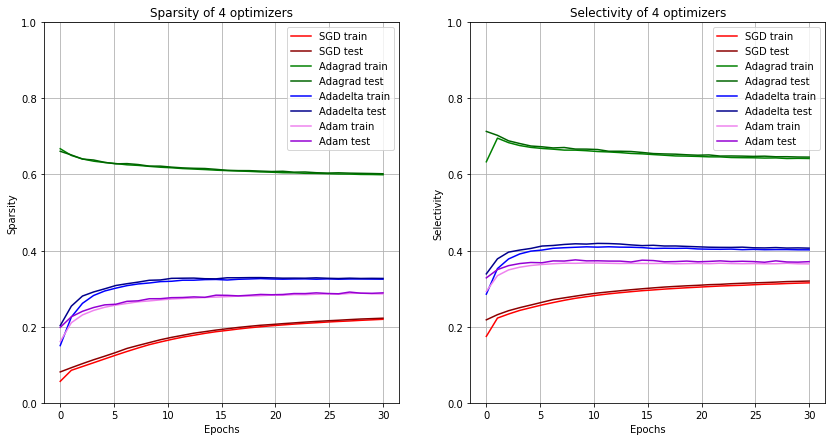

In [13]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,7))

# sparsity
ax1.plot(np.linspace(0.0, 30, num=30), sparsity_sgd_train, label='SGD train', color='red')
ax1.plot(np.linspace(0.0, 30, num=30), sparsity_sgd_test, label='SGD test', color='darkred')

ax1.plot(np.linspace(0.0, 30, num=30), sparsity_adagrad_train, label='Adagrad train', color='green')
ax1.plot(np.linspace(0.0, 30, num=30), sparsity_adagrad_test, label='Adagrad test', color='darkgreen')

ax1.plot(np.linspace(0.0, 30, num=30), sparsity_adadelta_train, label='Adadelta train', color='blue')
ax1.plot(np.linspace(0.0, 30, num=30), sparsity_adadelta_test, label='Adadelta test', color='darkblue')

ax1.plot(np.linspace(0.0, 30, num=30), sparsity_adam_train, label='Adam train', color='violet')
ax1.plot(np.linspace(0.0, 30, num=30), sparsity_adam_test, label='Adam test', color='darkviolet')

ax1.set_title('Sparsity of 4 optimizers')
ax1.grid()
ax1.legend()
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Sparsity')
ax1.set_ylim([0.0, 1])

# selectivity
ax2.plot(np.linspace(0.0, 30, num=30), selectivity_avg_sgd_train, label='SGD train', color='red')
ax2.plot(np.linspace(0.0, 30, num=30), selectivity_avg_sgd_test, label='SGD test', color='darkred')

ax2.plot(np.linspace(0.0, 30, num=30), selectivity_avg_adagrad_train, label='Adagrad train', color='green')
ax2.plot(np.linspace(0.0, 30, num=30), selectivity_avg_adagrad_test, label='Adagrad test', color='darkgreen')

ax2.plot(np.linspace(0.0, 30, num=30), selectivity_avg_adadelta_train, label='Adadelta train', color='blue')
ax2.plot(np.linspace(0.0, 30, num=30), selectivity_avg_adadelta_test, label='Adadelta test', color='darkblue')

ax2.plot(np.linspace(0.0, 30, num=30), selectivity_avg_adam_train, label='Adam train', color='violet')
ax2.plot(np.linspace(0.0, 30, num=30), selectivity_avg_adam_test, label='Adam test', color='darkviolet')

ax2.set_title('Selectivity of 4 optimizers')
ax2.grid()
ax2.legend()
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Selectivity')
ax2.set_ylim([0.0, 1])

# Accuracy

(0.85, 1.0)

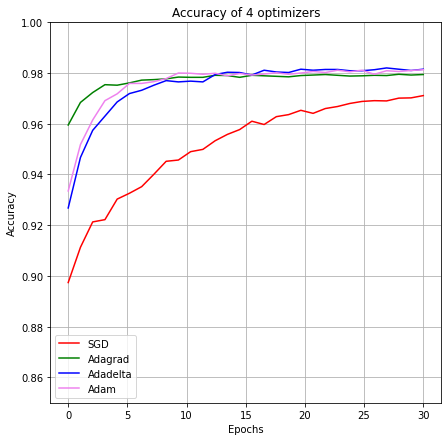

In [12]:
fig, (ax1) = plt.subplots(1, figsize=(7,7))

# Accuracy 
ax1.plot(np.linspace(0.0, 30, num=30), sgd_test, label='SGD', color='red')
ax1.plot(np.linspace(0.0, 30, num=30), agagrad_test, label='Adagrad', color='green')
ax1.plot(np.linspace(0.0, 30, num=30), adadelta_test, label='Adadelta', color='blue')
ax1.plot(np.linspace(0.0, 30, num=30), adam_test, label='Adam', color='violet')
ax1.set_title('Accuracy of 4 optimizers')
ax1.grid()
ax1.legend()
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy')
ax1.set_ylim([0.85, 1])

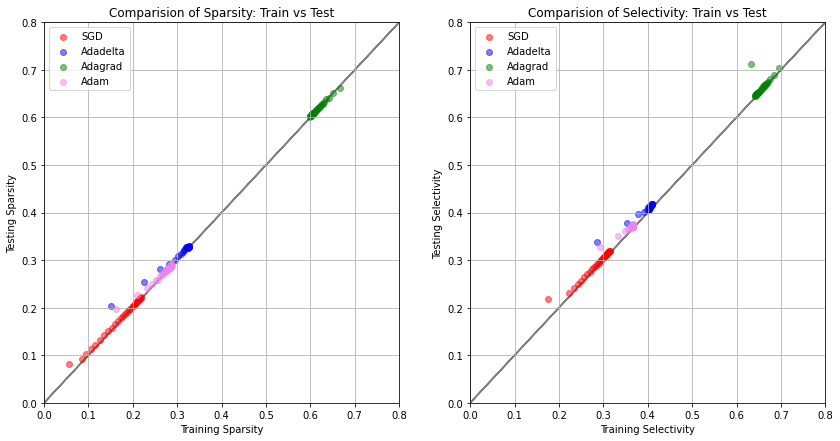

In [14]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,7))

lims = [
    np.min([ax1.get_xlim(), ax1.get_ylim()]),  # min of both axes
    np.max([ax1.get_xlim(), ax1.get_ylim()]),  # max of both axes
    
    np.min([ax2.get_xlim(), ax2.get_ylim()]),  # min of both axes
    np.max([ax2.get_xlim(), ax2.get_ylim()]),  # max of both axes
]

# now plot both limits against eachother
ax1.plot(lims, lims, 'k-', alpha=0.5, zorder=0)
ax1.scatter(sparsity_sgd_train,      sparsity_sgd_test, label='SGD', color='red', alpha=0.5)
ax1.scatter(sparsity_adadelta_train, sparsity_adadelta_test, label='Adadelta', color='blue', alpha=0.5)
ax1.scatter(sparsity_adagrad_train,  sparsity_adagrad_test, label='Adagrad', color='green', alpha=0.5)
ax1.scatter(sparsity_adam_train,     sparsity_adam_test, label='Adam', color='violet', alpha=0.5)
ax1.set_title('Comparision of Sparsity: Train vs Test')
ax1.legend()
ax1.grid()
ax1.set_xlim([0.0, 0.8])
ax1.set_ylim([0.0, 0.8])
ax1.set_xlabel('Training Sparsity')
ax1.set_ylabel('Testing Sparsity')

ax2.plot(lims, lims, 'k-', alpha=0.5, zorder=0)
ax2.scatter(selectivity_avg_sgd_train,      selectivity_avg_sgd_test, label='SGD', color='red', alpha=0.5)
ax2.scatter(selectivity_avg_adadelta_train, selectivity_avg_adadelta_test, label='Adadelta', color='blue', alpha=0.5)
ax2.scatter(selectivity_avg_adagrad_train,  selectivity_avg_adagrad_test, label='Adagrad', color='green', alpha=0.5)
ax2.scatter(selectivity_avg_adam_train,     selectivity_avg_adam_test, label='Adam', color='violet', alpha=0.5)
ax2.set_title('Comparision of Selectivity: Train vs Test')
ax2.legend()
ax2.grid()
ax2.set_xlim([0, 0.8])
ax2.set_ylim([0, 0.8])
ax2.set_xlabel('Training Selectivity')
ax2.set_ylabel('Testing Selectivity')

plt.show()